### import neccessay packages

In [126]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Reading dataset files

In [5]:
leads_df=pd.read_csv("Leads.csv")

In [6]:
leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Datatypes of Dataframe

In [9]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

#### Both "Prospect ID" and "Lead Number" can be removed because the id related columns won't contribute anything to the model.

In [12]:
print("Length of Prospect ID",len(leads_df["Prospect ID"].unique()))
print("Length of Lead Number",len(leads_df["Lead Number"].unique()))

Length of Prospect ID 9240
Length of Lead Number 9240


Removed low Valued data for lead Origins

In [14]:
leads_df["Lead Origin"].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [23]:
leads_df=leads_df[leads_df["Lead Origin"]!="Quick Add Form"]

Combined all low frequency for Lead Source

In [24]:
sources=leads_df["Lead Source"].unique()
sources

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [25]:
leads_df["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [26]:
leads_df["Lead Source"]=leads_df["Lead Source"].replace({"google":"Google","Facebook":"Others","bing":"Others",
                                                             "Click2call":"Others","Press_Release":"Others","Press_Release":"Others",
                                                             "Social Media":"Others","Live Chat":"Others","youtubechannel":"Others","testone":"Others",
                                                             "Pay per Click Ads":"Others","welearnblog_Home":"Others","WeLearn":"Others","blog":"Others",
                                                             "NC_EDM":"Others"
                                                            })

In [27]:
leads_df["Lead Source"].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: count, dtype: int64

Removing Null Values

In [28]:
df_null_values=leads_df.isnull().sum()

In [21]:
df_null_values.index


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
null_information = pd.DataFrame({
    'Null Count': leads_df.isnull().sum(),
    'Null Percentage': (leads_df.isnull().mean() * 100).round(2)
})

print(null_information)

                                               Null Count  Null Percentage
Prospect ID                                             0             0.00
Lead Number                                             0             0.00
Lead Origin                                             0             0.00
Lead Source                                            35             0.38
Do Not Email                                            0             0.00
Do Not Call                                             0             0.00
Converted                                               0             0.00
TotalVisits                                           136             1.47
Total Time Spent on Website                             0             0.00
Page Views Per Visit                                  136             1.47
Last Activity                                         103             1.11
Country                                              2460            26.63
Specialization           

### Lead Source Null Values Are Filled with most frequent value

In [30]:
leads_df["Lead Source"].fillna("Google",inplace=True)

In [31]:
leads_df["TotalVisits"].fillna(leads_df["TotalVisits"].mode(),inplace=True)

leads_df["Page Views Per Visit"].fillna(leads_df["Page Views Per Visit"].mode(),inplace=True)

In [32]:
leads_df["Last Activity"].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [33]:
leads_df["Last Activity"]=leads_df["Last Activity"].replace({"Unreachable":"Others","Unsubscribed":"Others",
                                                                 "Had a Phone Conversation":"Others","Approached upfront":"Others",
                                                                 "View in browser link Clicked":"Others","Email Received":"Others",
                                                                 "Email Marked Spam":"Others","Visited Booth in Tradeshow":"Others",
                                                                 "Resubscribed to emails":"Others"
                                                            })
leads_df["Last Activity"].fillna(leads_df["Last Activity"].mode(),inplace=True)

In [34]:
leads_df["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [35]:
df_india=leads_df[leads_df["Country"]=="India"]

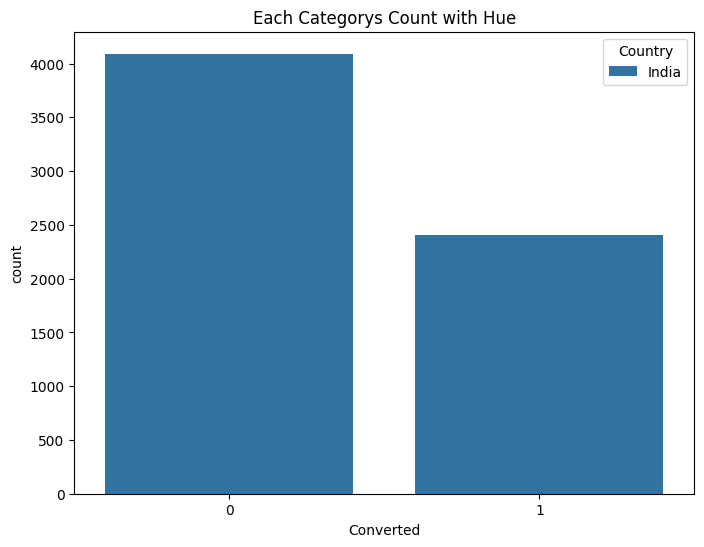

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', hue='Country', data=df_india)
plt.title('Each Categorys Count with Hue')
plt.show()

In [39]:
df_others=leads_df[leads_df["Country"]!="India"]

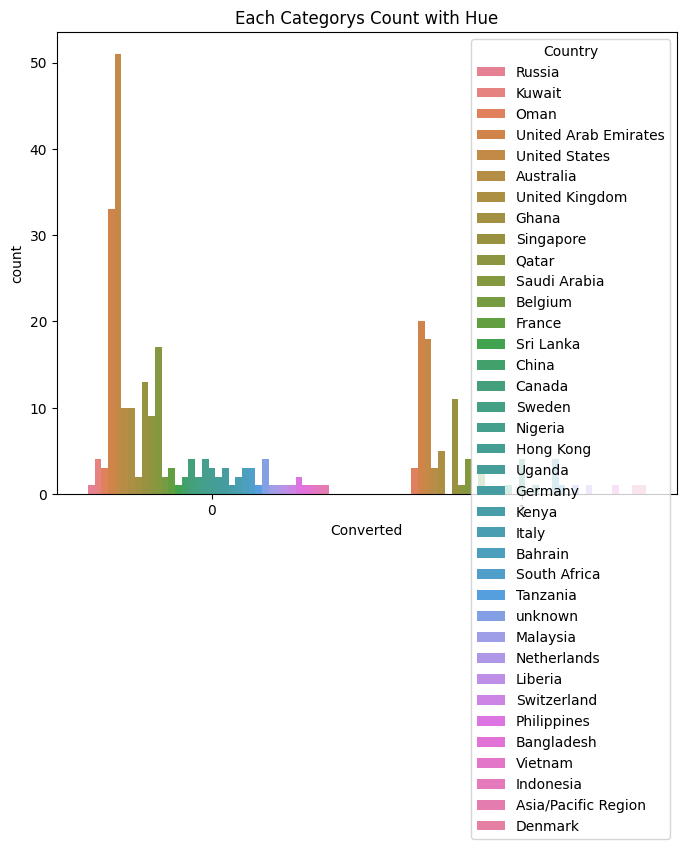

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', hue='Country', data=df_others)
plt.title('Each Categorys Count with Hue')
plt.show()

### No controls for the country column were found.


In [41]:
leads_df["Country"].fillna("Not Specified",inplace=True)

Select Might Be Default Value

In [42]:
leads_df["Specialization"].fillna("Select",inplace=True)

In [43]:
leads_df["Specialization"]=leads_df["Specialization"].replace({"Select":"Not Specified"})

In [44]:
leads_df["Specialization"].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [45]:
leads_df["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [46]:
leads_df["How did you hear about X Education"].isnull().sum()

2207

##### 85% Not ideal to have this column

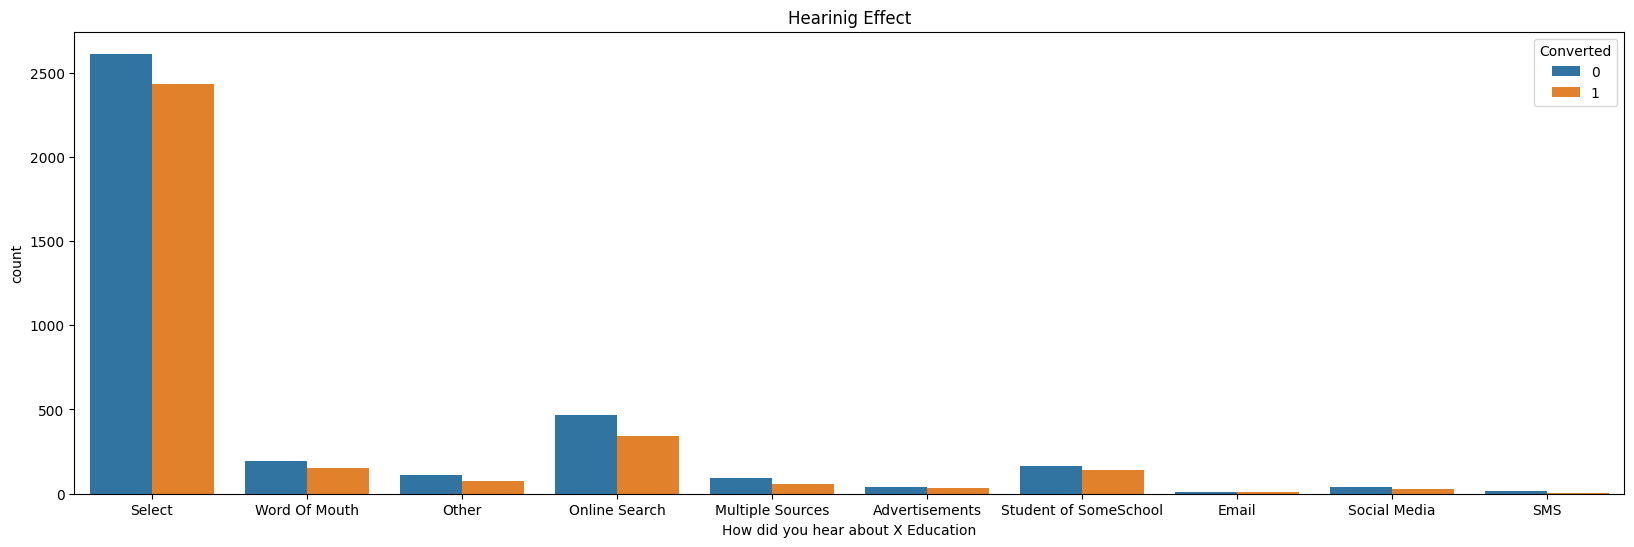

In [47]:
plt.figure(figsize=(20, 6))
sns.countplot(x='How did you hear about X Education', hue='Converted', data=leads_df)
plt.title('Hearinig Effect')
plt.show()

##### No In cases when it favors one form of reference, we can safely remove this column.


In [48]:
leads_df.drop("How did you hear about X Education",axis=1,inplace=True)

In [49]:
leads_df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5599
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [1262]:
leads_df["What is your current occupation"].isnull().sum()

In [50]:
leads_df["What is your current occupation"].fillna("Other",inplace=True)

In [51]:
leads_df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6527
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

Due to its monopsony and single category, the column will not make sense.

In [52]:
leads_df.drop("What matters most to you in choosing a course",axis=1,inplace=True)

In [53]:
leads_df["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [54]:
leads_df["Tags"].isnull().sum()

3352

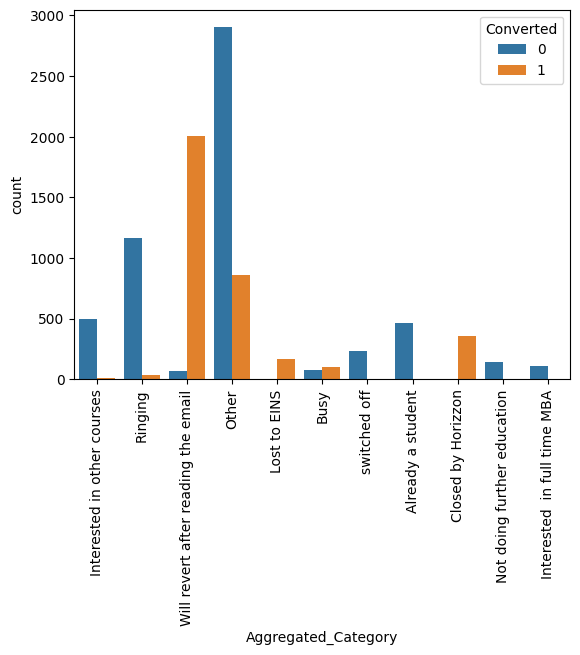

In [55]:
top_categories = leads_df["Tags"].value_counts().nlargest(10).index
leads_df['Aggregated_Category'] = leads_df['Tags'].where(leads_df['Tags'].isin(top_categories), 'Other')

sns.countplot(x='Aggregated_Category', hue='Converted', data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [56]:
leads_df["Aggregated_Category"].value_counts()

Aggregated_Category
Other                                  3765
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Name: count, dtype: int64

In [57]:
tags_null=leads_df[leads_df["Tags"].isnull()]
tags_null["Tags"].fillna("Exp",inplace=True)

C:\Users\GURU\AppData\Local\Temp\ipykernel_23824\1714917523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_null["Tags"].fillna("Exp",inplace=True)


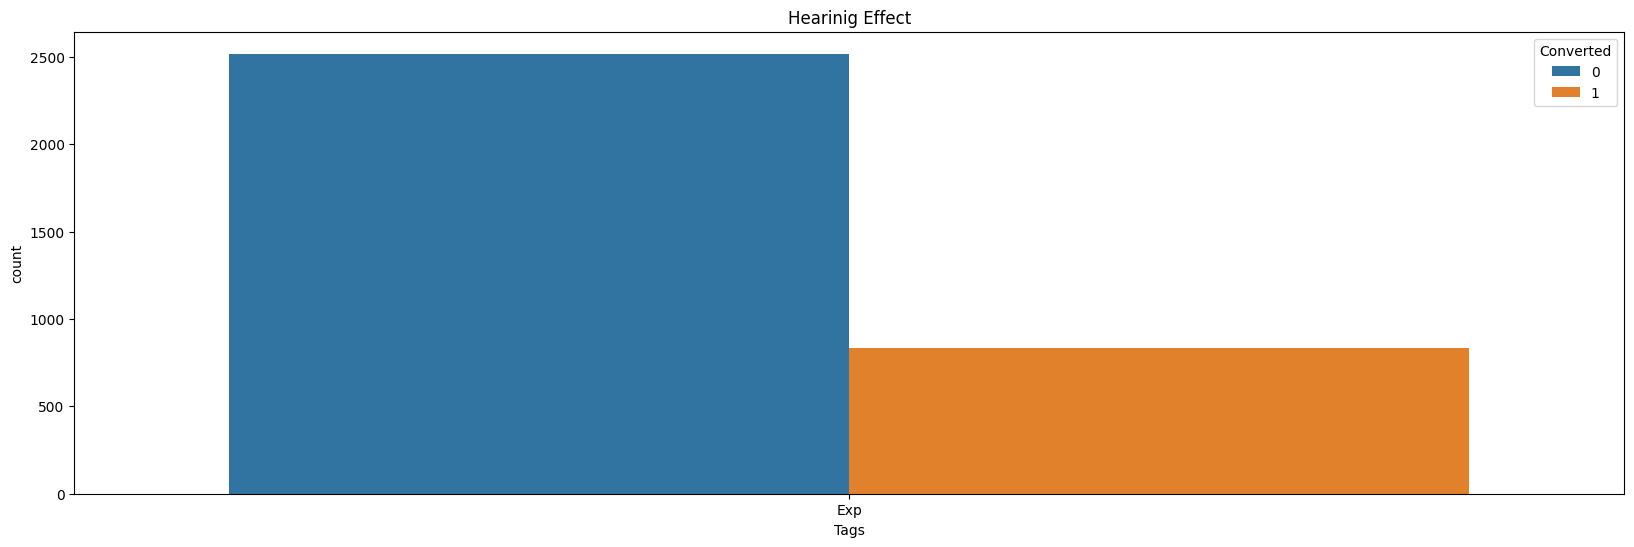

In [58]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Tags', hue='Converted', data=tags_null)
plt.title('Hearinig Effect')
plt.show()

In [59]:
leads_df["Converted"].value_counts()

Converted
0    5679
1    3560
Name: count, dtype: int64

In [60]:
tags_null["Converted"].value_counts()

Converted
0    2517
1     835
Name: count, dtype: int64

##### Removing Null Values is not recommended. Due to the fact that it accounts for 30% of conversions and 50% of non-conversions


In [61]:
leads_df["Tags"].fillna("Not Specified",inplace=True)

In [62]:
leads_df["Lead Quality"].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [63]:
leads_df["Lead Quality"].isnull().sum()

4766

In [64]:
data_leads_null=leads_df[leads_df["Lead Quality"].isnull()]

In [1278]:
data_leads_null["Converted"].value_counts()

##### since 1023 people are converted in Lead Quality mentioned as Null
##### so Straight Away we can convert those 1023 into high relavance
##### and 3743 people are not enrolled so we can consider "Low In Relevance"

In [1279]:
leads_df["Lead Quality"].value_counts()

In [65]:
leads_df["Lead Quality"]=np.where((leads_df["Lead Quality"].isnull()) & (leads_df["Converted"]==1),'High in Relevance',leads_df["Lead Quality"])
leads_df["Lead Quality"]=np.where((leads_df["Lead Quality"].isnull()) & (leads_df["Converted"]==0),"Low in Relevance",leads_df["Lead Quality"])

In [66]:
leads_df["Lead Quality"].isnull().sum()

0

##### 80% of potential leads are converted effectively.

In [68]:
leads_df["Lead Quality"]=np.where((leads_df["Lead Quality"].isnull()) & (leads_df["Lead Profile"]=="Potential Lead"),'High in Relevance',leads_df["Lead Quality"])


lead profile

In [69]:
leads_df["Lead Profile"].value_counts()

Lead Profile
Select                         4145
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

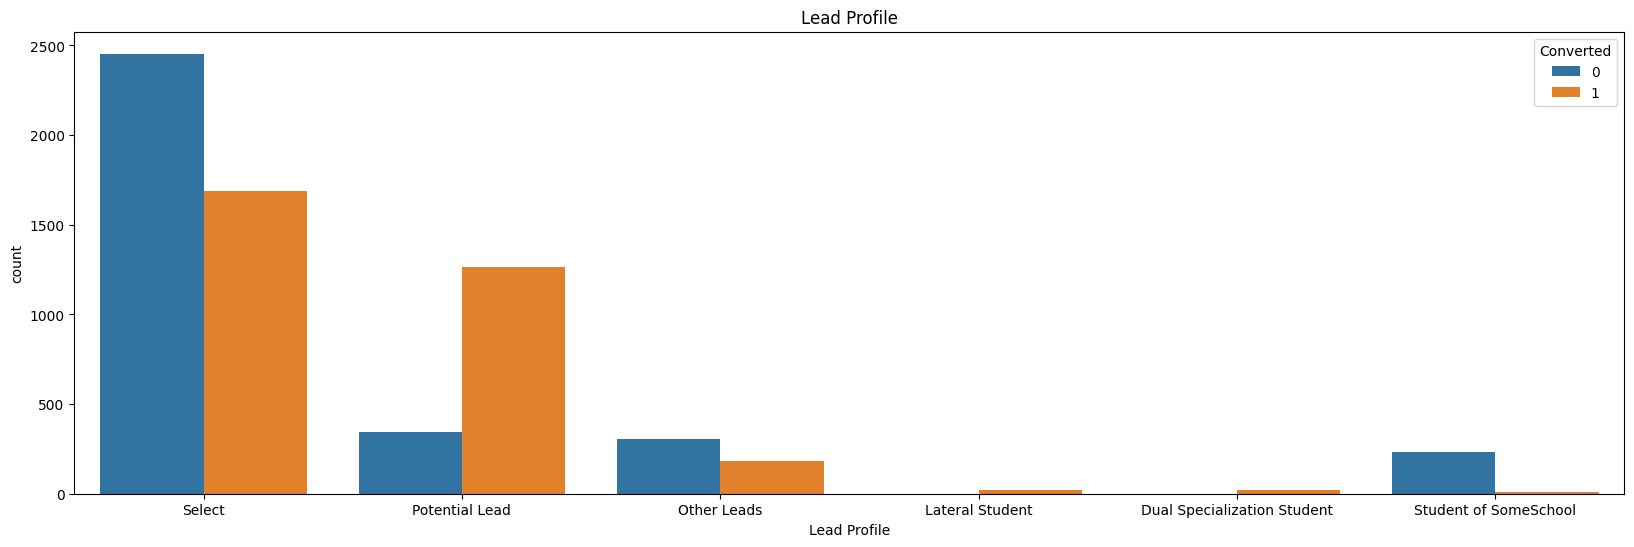

In [70]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Lead Profile', hue='Converted', data=leads_df)
plt.title('Lead Profile')
plt.show()

In [71]:
leads_df["Lead Profile"].isnull().sum()

2709

In [73]:
leads_df["Lead Profile"]=np.where((leads_df["Lead Profile"]=="Select") & (leads_df["Converted"]==1),'Potential Lead',leads_df["Lead Profile"])

In [74]:
leads_df["Lead Profile"]=np.where((leads_df["Lead Profile"].isnull()) & (leads_df["Converted"]==1),'Potential Lead',leads_df["Lead Profile"])
leads_df["Lead Profile"]=np.where((leads_df["Lead Profile"].isnull()) & (leads_df["Converted"]==0),'Not Usefull',leads_df["Lead Profile"])


In [75]:
leads_df["Lead Profile"]=leads_df["Lead Profile"].rename({"Select":"Not Specified"})

##### Value counts of each city

In [76]:
leads_df["City"].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

In [77]:
leads_df["City"]=leads_df["City"].rename({
    "Select":"Not Specified"
})

In [78]:
leads_df["City"].fillna("Not Specified",inplace=True)

In [79]:
def score(value):
    if(value=="01.High"):
        return 17.0
    elif(value=="02.Medium"):
        return 15.0 
    else:
        return 10.0
        

In [80]:
leads_df["Last Activity"].value_counts()

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: count, dtype: int64

In [81]:
leads_df["Asymmetrique Activity Index"].value_counts()

Asymmetrique Activity Index
02.Medium    3838
01.High       821
03.Low        362
Name: count, dtype: int64

In [82]:
good_activity=["Olark Chat Conversation","Page Visited on Website","Converted to Lead","Form Submitted on Website"
              "Had a Phone Conversation","Approached upfront","Resubscribed to emails"]
medium_activity=["Olark Chat Conversation","Page Visited on Website","Form Submitted on Website"]


In [83]:
leads_df["Asymmetrique Activity Index"].isnull().sum()

4218

In [84]:
leads_df["Asymmetrique Activity Index"]=np.where((leads_df["Asymmetrique Activity Index"].isnull()) & (leads_df["Last Activity"].isin(good_activity)),'01.High',leads_df["Asymmetrique Activity Index"])
leads_df["Asymmetrique Activity Index"]=np.where((leads_df["Asymmetrique Activity Index"].isnull()) & (leads_df["Converted"]==1),'01.High',leads_df["Asymmetrique Activity Index"])
leads_df["Asymmetrique Activity Index"]=np.where((leads_df["Asymmetrique Activity Index"].isnull()) & (leads_df["Converted"]==0) & (leads_df["Last Activity"].isin(medium_activity)),'02.Medium',leads_df["Asymmetrique Activity Index"])
leads_df["Asymmetrique Activity Index"]=np.where((leads_df["Asymmetrique Activity Index"].isnull()) & (leads_df["Converted"]==0),'03.Low',leads_df["Asymmetrique Activity Index"])

In [85]:
leads_df["Asymmetrique Profile Index"].value_counts()

Asymmetrique Profile Index
02.Medium    2787
01.High      2203
03.Low         31
Name: count, dtype: int64

In [86]:
leads_df["Lead Profile"].value_counts()

Lead Profile
Potential Lead                 3674
Select                         2454
Not Usefull                    2339
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [87]:
leads_df["Asymmetrique Profile Index"]=np.where((leads_df["Asymmetrique Profile Index"].isnull()) & (leads_df["Converted"]==1) & (leads_df["Lead Profile"]=="Potential Lead"),'01.High',leads_df["Asymmetrique Profile Index"])
leads_df["Asymmetrique Profile Index"]=np.where((leads_df["Asymmetrique Profile Index"].isnull()) & (leads_df["Converted"]==1) & (leads_df["Lead Profile"]=="Not Usefull"),'02.Medium',leads_df["Asymmetrique Profile Index"])
leads_df["Asymmetrique Profile Index"]=np.where((leads_df["Asymmetrique Profile Index"].isnull()) & (leads_df["Converted"]==1),'02.Medium',leads_df["Asymmetrique Profile Index"])
leads_df["Asymmetrique Profile Index"]=np.where((leads_df["Asymmetrique Profile Index"].isnull()) & (leads_df["Converted"]==0),'03.Low',leads_df["Asymmetrique Profile Index"])


In [88]:
print(leads_df["Asymmetrique Profile Index"].isnull().sum())
print(leads_df["Asymmetrique Activity Score"].value_counts())

0
Asymmetrique Activity Score
14.0    1770
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64


In [89]:
leads_df["Asymmetrique Activity Score"]=leads_df["Asymmetrique Activity Index"].apply(score)
leads_df["Asymmetrique Profile Score"]=leads_df["Asymmetrique Profile Index"].apply(score)

In [90]:
leads_df.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 136
Total Time Spent on Website                   0
Page Views Per Visit                        136
Last Activity                               103
Country                                       0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

## Data Visulization

In [92]:
def Quantify_function(column):
    percentage = leads_df.groupby(column)['Converted'].mean() * 100
    return percentage

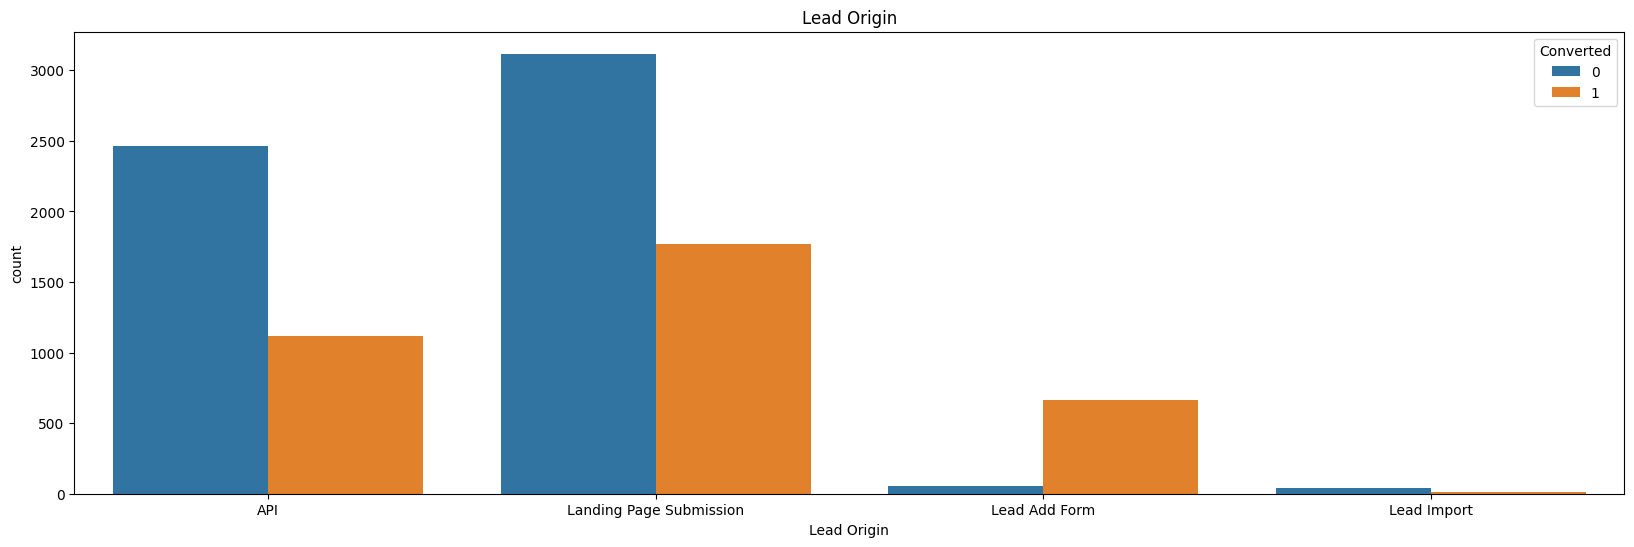

In [136]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Lead Origin', hue='Converted', data=leads_df)
plt.title('Lead Origin')
plt.show()

#### Quantify Parameters from Lead Origin Category Variables

In [94]:
leads_df["origin_percentage"]=leads_df["Lead Origin"].map(Quantify_function("Lead Origin"))

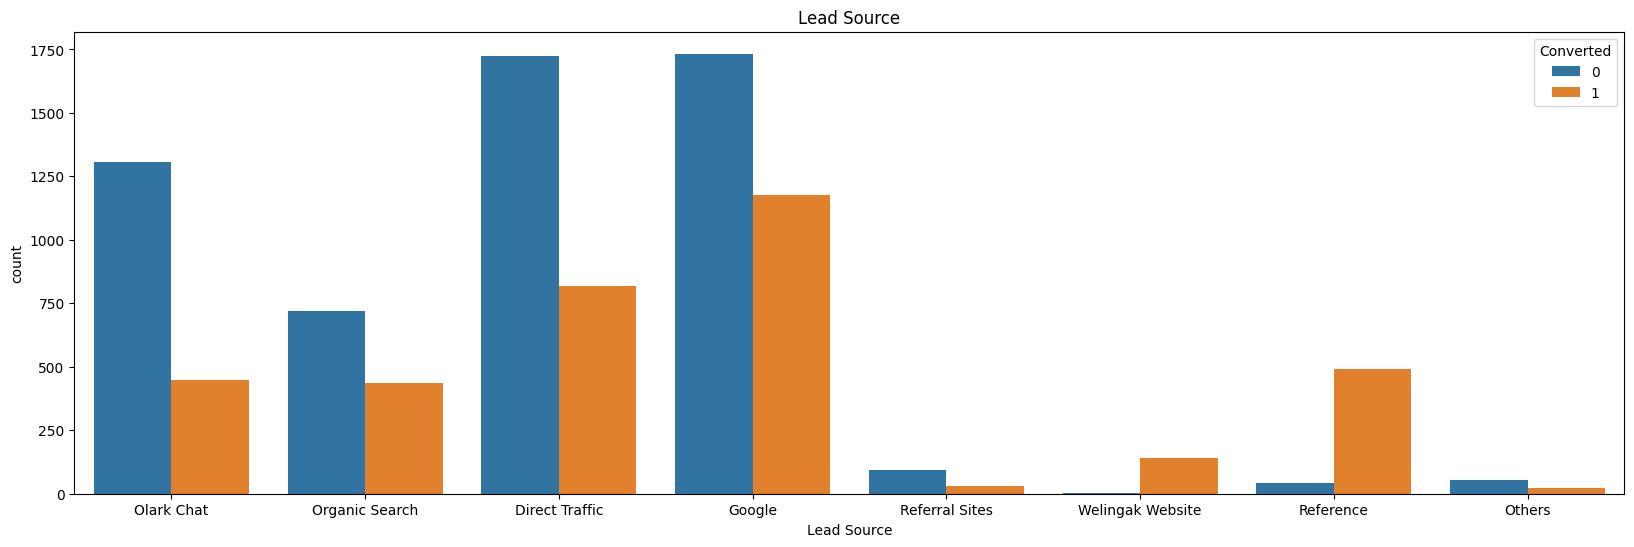

In [95]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Lead Source', hue='Converted', data=leads_df)
plt.title('Lead Source')
plt.show()

In [96]:
leads_df["source_percentage"]=leads_df["Lead Source"].map(Quantify_function("Lead Source"))

In [98]:
leads_df["do_not_mail_per"]=leads_df["Do Not Email"].map(Quantify_function("Do Not Email"))

In [100]:
leads_df["do_not_call_per"]=leads_df["Do Not Call"].map(Quantify_function("Do Not Call"))

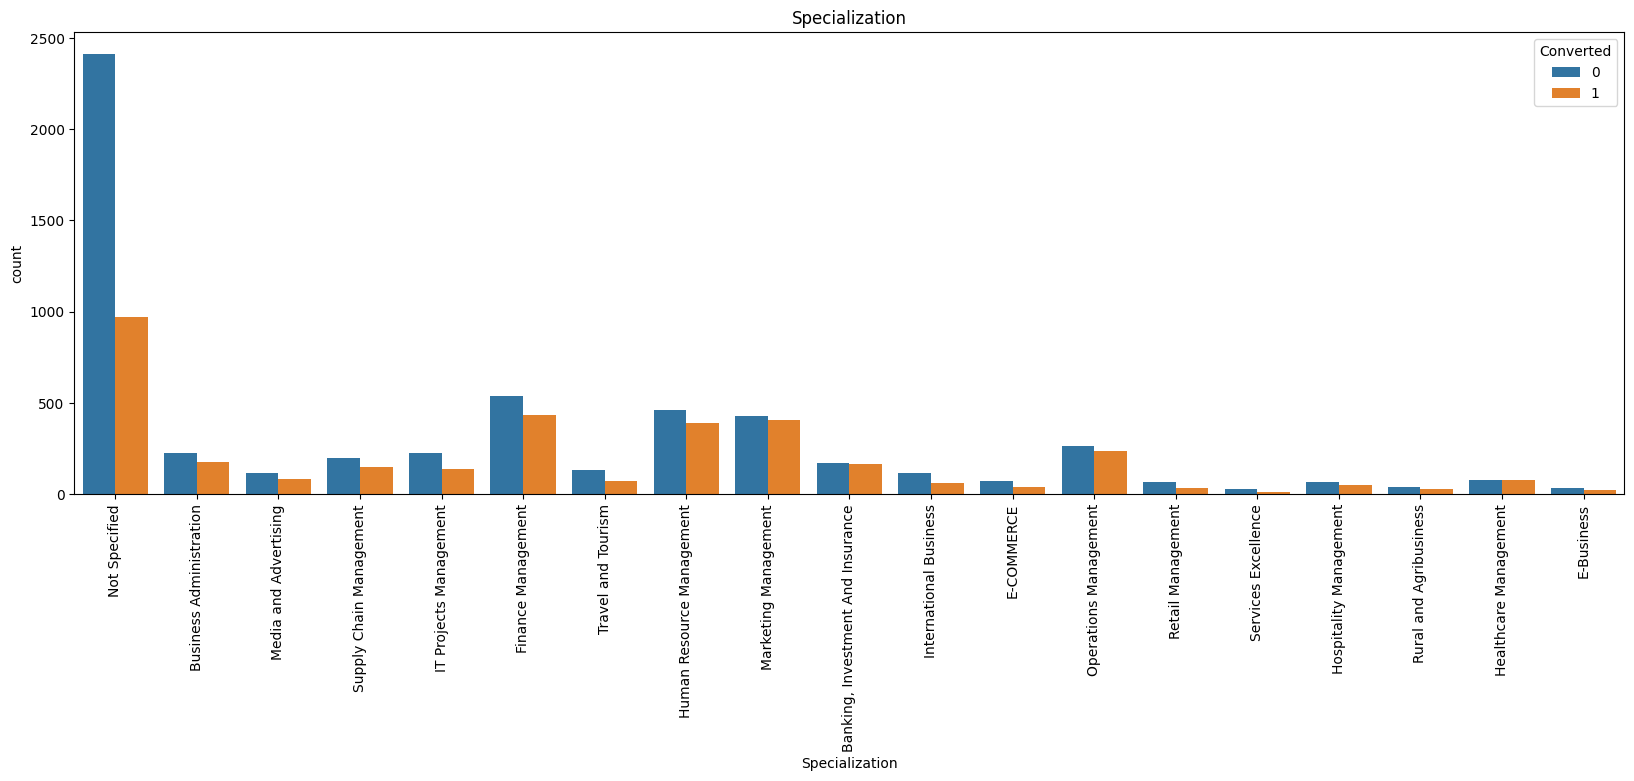

In [105]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Specialization', hue='Converted', data=leads_df)
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

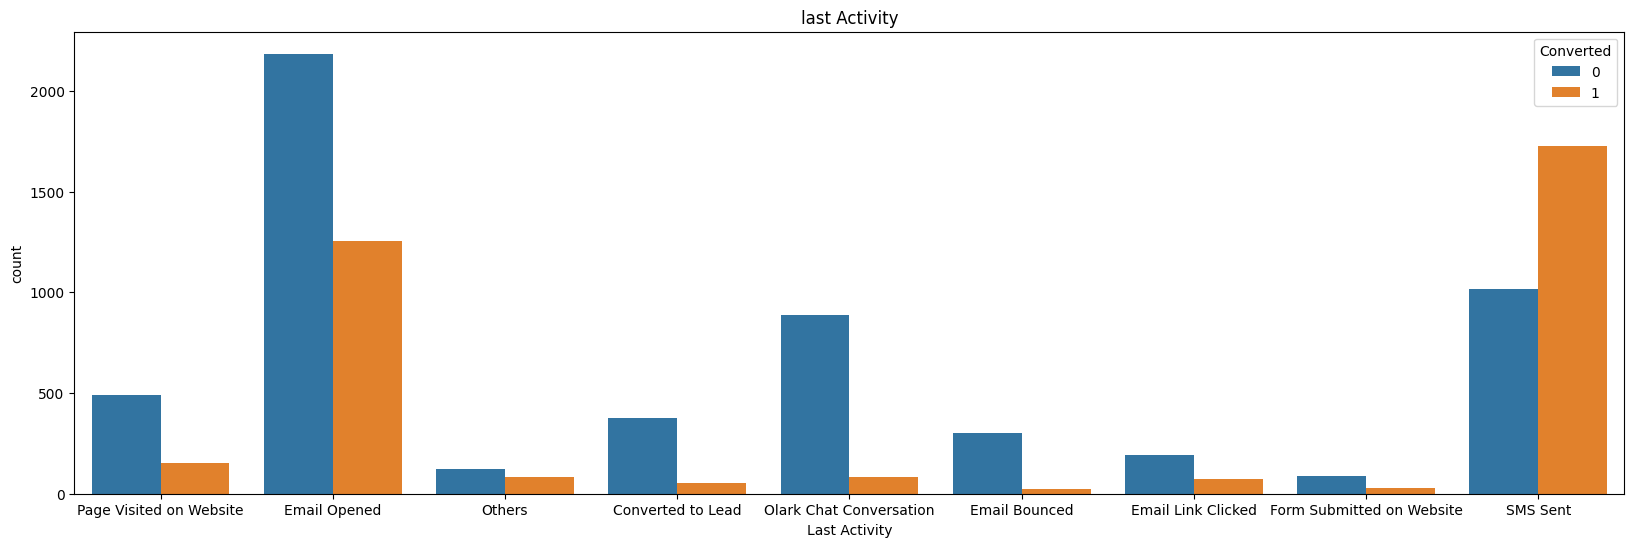

In [101]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Last Activity', hue='Converted', data=leads_df)
plt.title('last Activity')
plt.show()

In [102]:
leads_df["last_act_per"]=leads_df["Last Activity"].map(Quantify_function("Last Activity"))

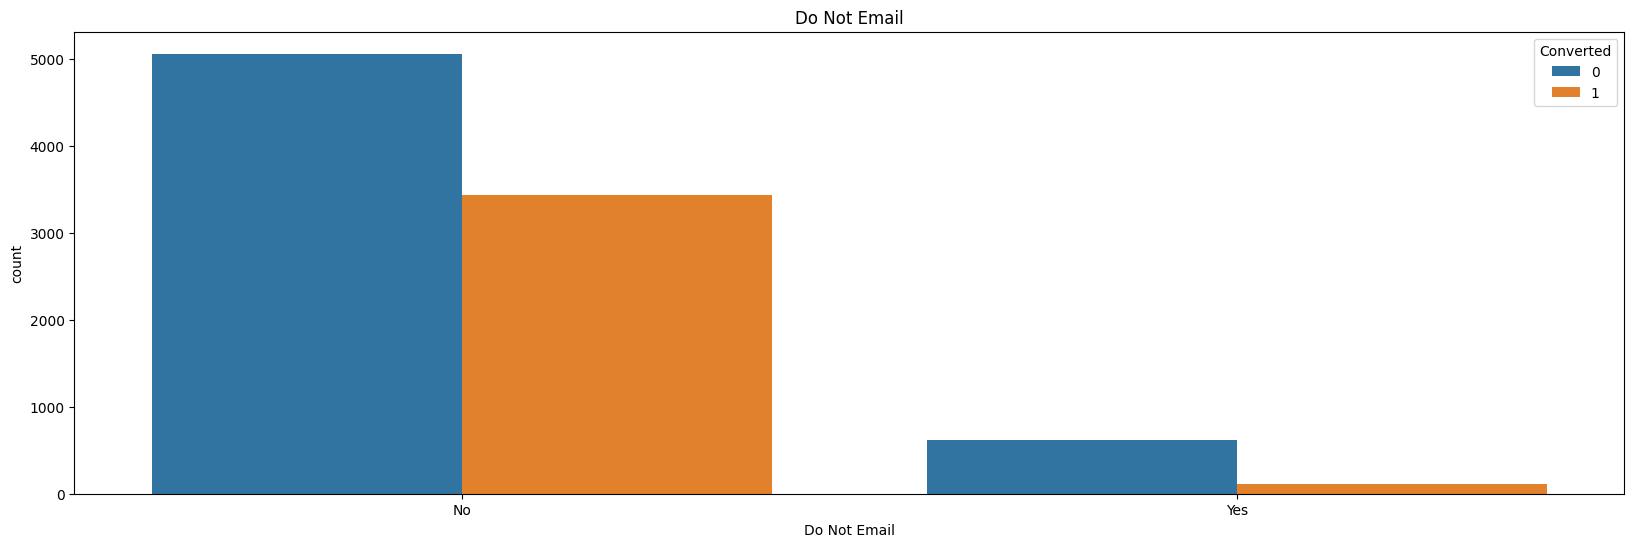

In [104]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Do Not Email', hue='Converted', data=leads_df)
plt.title('Do Not Email')
plt.show()

In [107]:
leads_df["tags_per"]=leads_df["Tags"].map(Quantify_function("Tags"))

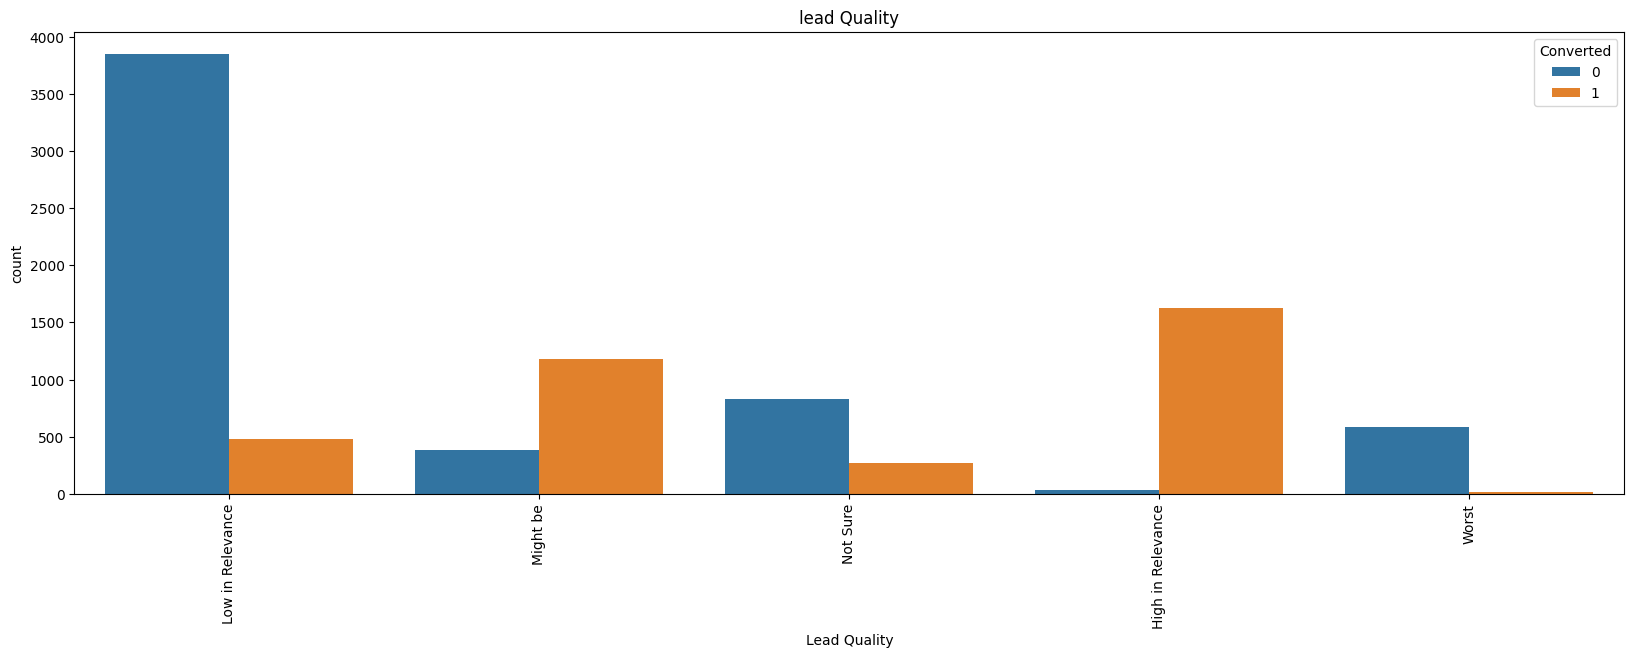

In [108]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Lead Quality', hue='Converted', data=leads_df)
plt.title('lead Quality')
plt.xticks(rotation=90)
plt.show()

In [116]:
leads_df["lead_quality_per"]=leads_df["Lead Quality"].map(Quantify_function("Lead Quality"))

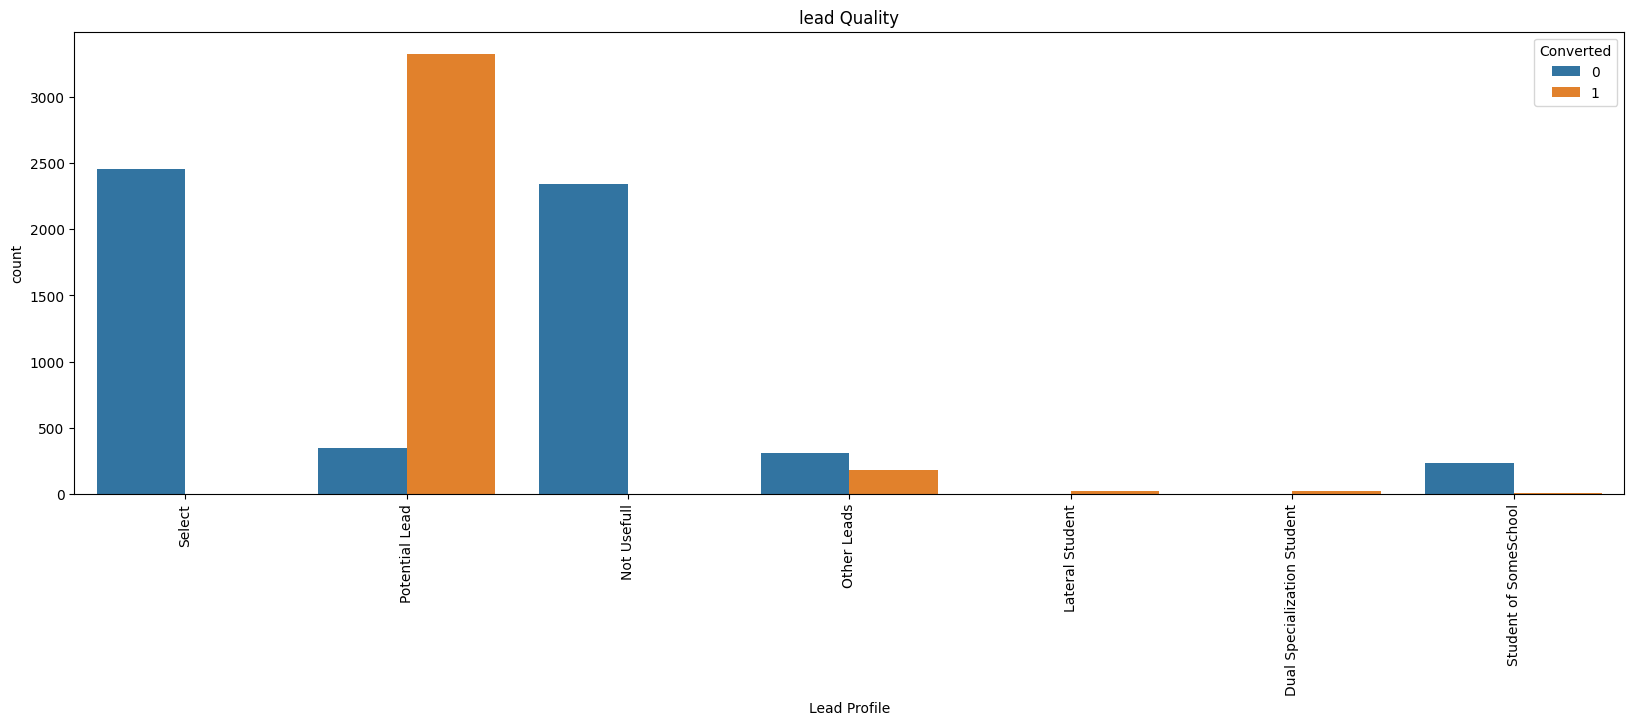

In [110]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Lead Profile', hue='Converted', data=leads_df)
plt.title('lead Quality')
plt.xticks(rotation=90)
plt.show()

In [112]:
leads_df["activity_index_per"]=leads_df["Asymmetrique Activity Index"].map(Quantify_function("Asymmetrique Activity Index"))

In [113]:
leads_df["profile_index_per"]=leads_df["Asymmetrique Profile Index"].map(Quantify_function("Asymmetrique Profile Index"))

In [ ]:
leads_df["master_per"]=leads_df["A free copy of Mastering The Interview"].map(Quantify_function("A free copy of Mastering The Interview"))

In [117]:
leads_df["Specialization_per"]=leads_df["Specialization"].map(Quantify_function("Specialization"))
leads_df["occupation_per"]=leads_df["What is your current occupation"].map(Quantify_function("What is your current occupation"))

In [120]:
usefullColumns=[                        
"source_percentage",                         
"origin_percentage",                         
"do_not_mail_per",                           
 "do_not_call_per",                           
 "last_act_per",                             
 "Specialization_per",                       
 "occupation_per",                            
 "tags_per",                                  
 "lead_quality_per",                                                   
 "activity_index_per",                        
 "profile_index_per","Converted","TotalVisits","Total Time Spent on Website",
    "Page Views Per Visit"
,"Asymmetrique Activity Score","Asymmetrique Profile Score"]

In [123]:
filtered_leads_df=leads_df[usefullColumns]
filtered_leads_df.head(5)

,source_percentage,origin_percentage,do_not_mail_per,do_not_call_per,last_act_per,Specialization_per,occupation_per,tags_per,lead_quality_per,activity_index_per,profile_index_per,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,25.527066,31.145251,40.47731,38.519,23.593750,28.668639,43.579211,2.534113,11.026352,42.158385,33.561644,0,0.0,0,0.0,15.0,15.0
1,37.781629,31.145251,40.47731,38.519,36.456212,28.668639,43.579211,2.826268,11.026352,42.158385,33.561644,0,5.0,674,2.5,15.0,15.0
2,32.166732,36.185018,40.47731,38.519,36.456212,44.416873,37.142857,96.862934,75.576923,42.158385,68.896052,1,2.0,1532,2.0,15.0,17.0
3,32.166732,36.185018,40.47731,38.519,40.975610,41.871921,43.579211,2.826268,24.358974,42.158385,68.896052,0,1.0,305,1.0,15.0,17.0
4,40.405777,36.185018,40.47731,38.519,12.616822,28.668639,43.579211,96.862934,75.576923,42.158385,68.896052,1,2.0,1428,1.0,15.0,17.0


##### Correlation

In [124]:
filtered_leads_df.corr()

,source_percentage,origin_percentage,do_not_mail_per,do_not_call_per,last_act_per,Specialization_per,occupation_per,tags_per,lead_quality_per,activity_index_per,profile_index_per,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
source_percentage,1.000000,0.919504,0.034949,0.024805,0.204090,0.100499,0.274416,0.318803,0.305871,0.111626,0.279384,0.335818,-0.064725,-0.012837,-0.088361,0.110977,0.240992
origin_percentage,0.919504,1.000000,0.005800,0.021598,0.183106,0.107524,0.266827,0.324863,0.298803,0.120869,0.273369,0.325892,-0.129193,-0.099455,-0.199659,0.120583,0.230421
do_not_mail_per,0.034949,0.005800,1.000000,0.004320,0.147087,0.009170,0.065599,0.120152,0.106702,0.114889,0.087979,0.136143,-0.033842,0.047593,-0.033582,0.114657,0.096456
do_not_call_per,0.024805,0.021598,0.004320,1.000000,-0.012072,0.018940,0.003662,0.022756,0.004612,0.007958,0.006672,0.018585,0.003221,0.006810,-0.005918,0.007944,0.008178
last_act_per,0.204090,0.183106,0.147087,-0.012072,1.000000,0.197025,0.225205,0.264518,0.401257,-0.065035,0.299517,0.392148,0.054189,0.173641,0.155824,-0.065790,0.258884
Specialization_per,0.100499,0.107524,0.009170,0.018940,0.197025,1.000000,0.268084,0.221931,0.096351,-0.055355,0.269495,0.170076,0.214120,0.263990,0.338067,-0.056313,0.177805
occupation_per,0.274416,0.266827,0.065599,0.003662,0.225205,0.268084,1.000000,0.384532,0.302419,0.105994,0.272518,0.416704,0.029979,0.162095,0.044810,0.105227,0.249691
tags_per,0.318803,0.324863,0.120152,0.022756,0.264518,0.221931,0.384532,1.000000,0.507985,0.351201,0.474420,0.792157,0.017584,0.294694,-0.002145,0.351002,0.450372
lead_quality_per,0.305871,0.298803,0.106702,0.004612,0.401257,0.096351,0.302419,0.507985,1.000000,0.292339,0.463115,0.749615,0.017840,0.261661,0.000521,0.292172,0.440608
activity_index_per,0.111626,0.120869,0.114889,0.007958,-0.065035,-0.055355,0.105994,0.351201,0.292339,1.000000,0.506423,0.433464,0.000337,0.107324,-0.087613,0.999940,0.546745


#### Model Building

In [127]:

# Assuming 'target_column' is the name of your target variable column
X = filtered_leads_df.drop('Converted', axis=1)
y = filtered_leads_df['Converted']


In [137]:
X["last_act_per"].fillna(0,inplace=True)
X["TotalVisits"].fillna(0,inplace=True)
X["Page Views Per Visit"].fillna(0,inplace=True)


##### Split the data into training and testing sets

In [139]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#### Standardize features

In [140]:
# Standardize features if needed (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LogisticRegression model

In [141]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)



LogisticRegression(random_state=42)

In [142]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)


#####  Evaluate the model

In [146]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy*100


97.83549783549783

In [147]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1652,   28],
       [  32, 1060]], dtype=int64)

In [149]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1680
           1       0.97      0.97      0.97      1092

    accuracy                           0.98      2772
   macro avg       0.98      0.98      0.98      2772
weighted avg       0.98      0.98      0.98      2772



##### Print the evaluation metrics

In [150]:

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9783549783549783
Confusion Matrix:
[[1652   28]
 [  32 1060]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1680
           1       0.97      0.97      0.97      1092

    accuracy                           0.98      2772
   macro avg       0.98      0.98      0.98      2772
weighted avg       0.98      0.98      0.98      2772

